# COGS 108 - EDA Checkpoint

# Names

- Soham Bhanvadia
- Eric Duong
- Amogh Vig
- Joshua Zhu

<a id='research_question'></a>
# Research Question

Does the frequency of sport injuries in the NBA increase depending on a player's position or role?

# Setup

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

### Dataset(s)

(Copy this information for each dataset)
<br>
Dataset Name: <br>
- Link to the dataset:<br>
- Number of observations:<br>
- 1-2 sentences describing each dataset.<br>

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

Dataset Name: NBA Injuries from 2010-2020 <br>
Link to the dataset: https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018?resource=download<br>
Number of observations: 27105<br>

This dataset includes information about injuries in the NBA from 2010 to 2020. This includes the date of the received injury, the NBA player name, the team, when they recover from the injury (acquired), when they get the injury (relinquished), and any extra notes. This dataset has a new observation for each update on a given athlete's injury, so each athlete may show up on different observation rows multiple times for the same injury time period. However, this dataset does not contain information about position and physical data.

Dataset Name: NBA Height and Weight Analysis<br>
Link to the dataset: https://www.kaggle.com/code/justinas/nba-height-and-weight-analysis/data?select=all_seasons.csv<br>
Number of observations: 11145<br>

We plan on using a second dataset to make up for the lack of information about position and physical data. This dataset includes player information including name, team name, age, height, weight, college, country, draft year, draft round, draft number, games played, points, rebounds, assists, net rating, offensive rebound percent, defensive rebound percent, usage percent, true shooting percent, assist percent, and season played. For our purposes, we only care about athlete data about their names, team name, age, height, weight, games played, and season played.

Dataset Name: NBA Player Statistics<br>
Link to the dataset: https://data.world/etocco/nba-player-stats<br>
Number of observations: 14573<br>

The last dataset we use will include the players' positions. While this dataset includes player statistics such as goals, field goals, three pointers, free throws, and other information about player performance from 1997 to 2022, we only need information about their positions from 2010 to 2020.

We want to combine these datasets with priority placed onto the injury dataset. As the injury dataset contains data from 2010 to 2020, and the player stats datasets contains data from 1997 to 2022, we must merge the data from 2010 to 2020, and only merge together player data that exist on the injury dataset. By matching by name, we can merge together the datasets to include accurate data about each player's position, team, injury, notes, age, height, weight, games played, and seasons played.

In [2]:
df_injuries = pd.read_csv('data/injuries_2010-2020.csv')
df_players = pd.read_csv('data/player_stats_1997-2019.csv')
df_teams = pd.read_csv('data/NBA_player_stats.csv')

In [3]:
df_injuries.shape

(27105, 5)

In [4]:
df_injuries.head()

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [5]:
df_players.shape

(11145, 22)

In [6]:
df_players.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [7]:
df_teams.shape

(14573, 31)

In [8]:
df_teams.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


# Data Cleaning

After all of the datasets and required packages are loaded, we first need to make all of the column names as well as the 
all of the values on the "notes" column lowercase. This is to ensure consistency between all of the column names and to prevent mismatches due to case sensitivity later when we perform comparisons between "notes" for each row.

In [9]:
#Make all column names lowercase
df_injuries.columns = df_injuries.columns.str.lower()

#Changing all "notes" to be lowercase
df_injuries["notes"] = df_injuries["notes"].apply(str.lower)

df_injuries.head()

,date,team,acquired,relinquished,notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn acl in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


As we see above, there are 5 columns within our original injuries dataset. One of the columns, "acquired", denotes whenever a player returns after recovering from an injury. Although this would be useful for analyzing time missed per each injury, it is often inconsistent depending on the type of injury and contains information outside of the scope of this project. Thus, we will keep all rows not containing "acquired" and remove the column entirely afterwards. This allows us to rename the "relinquished" column to "player", making it more representative of our data.

Furthermore, some players recover/sustain injuries while not contracted to a team, resulting in having no "team" for the respective injury data in the dataset. To prevent inconsistencies in future comparisons, we replace the missing values with "None".

In [10]:
#Keep rows in df that do not have "acquired" value and remove such column afterwards
df_injuries = df_injuries[df_injuries["acquired"].isna() == True]
df_injuries = df_injuries.drop(["acquired"], axis = 1)

#Renaming the "relinquished" column to "player"
df_injuries = df_injuries.rename(columns = {'relinquished': 'player'}) 

#Replacing missing team values
df_injuries["team"] = df_injuries["team"].replace({np.NaN: "None"})
df_injuries.head()

,date,team,player,notes
0,2010-10-03,Bulls,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,Jonas Jerebko,torn right achilles tendon (out indefinitely)
2,2010-10-06,Pistons,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,Jeff Ayres,torn acl in right knee (out indefinitely)
4,2010-10-08,Nets,Troy Murphy,strained lower back (out indefinitely)


Finally, before starting to clean up our data, we want to sort the entire dataframe by two columns, "player" and "date". Sorting the data by "player" ensures that for each player, all of their injuries will be grouped together on the dataframe, simplfying our cleaning up process in the future. Similarly, sorting by "date" organizes each players' injuries in chronological order, creating a complete injury history of each player on the dataframe. 

In [11]:
#Converting each date into a datetime object, allowing for comparison between dates
df_injuries['date'] = pd.to_datetime(df_injuries['date'])

#Sort the dataframe by player first, then date
df_injuries = df_injuries.sort_values(by = ['player', 'date'])

#Reset indicies of the rows before cleaning
df_injuries = df_injuries.reset_index(drop = True)
df_injuries.head()

,date,team,player,notes
0,2013-03-01,Hawks,Mike Scott,placed on il
1,2014-11-12,Hawks,Mike Scott,placed on il with back injury
2,2014-12-10,Hawks,Mike Scott,placed on il with flu
3,2015-03-13,Hawks,Mike Scott,placed on il with fractured left big toe
4,2015-04-15,Hawks,Mike Scott,placed on il with back injury


Now, our dataset is ready to be cleaned! One important thing to note is that this dataset not only includes basketball-related injuries, but also any conditions that affect players' abilities to play in games (medical conditions, personal matters, etc.). For example, you can see above that for player "Mike Scott", it is listed that he had the flu on December 10, 2014. Since our project is only focused on basketball-related injuries, we need to first remove all rows that contain injuries/situations for all other designations not related to basketball. 

In [12]:
df_injuries = df_injuries[df_injuries["notes"].str.contains('surgery')==False] #Remove rows with surgery
df_injuries = df_injuries[df_injuries["notes"].str.contains('virus')==False] #Remove rows with virus
df_injuries = df_injuries[df_injuries["notes"].str.contains('flu')==False]  #Remove rows with flu
df_injuries = df_injuries[df_injuries["notes"].str.contains('illness')==False] #Remove rows with illness
df_injuries = df_injuries[df_injuries["notes"].str.contains('infection')==False] #Remove rows with infection
df_injuries = df_injuries[df_injuries["notes"].str.contains('dermatitis')==False] #Remove rows with dermatitis
df_injuries = df_injuries[df_injuries["notes"].str.contains('chicken pox')==False] #Remove rows with chicken pox
df_injuries = df_injuries[df_injuries["notes"].str.contains('stomach ache')==False] #Remove rows with stomach ache
df_injuries = df_injuries[df_injuries["notes"].str.contains('headache')==False] #Remove rows with headache
df_injuries = df_injuries[df_injuries["notes"].str.contains('migraine')==False] #Remove rows with migraine
df_injuries = df_injuries[df_injuries["notes"].str.contains('irregular heartbeat')==False] #Remove rows with irregular heartbeat
df_injuries = df_injuries[df_injuries["notes"].str.contains('heart condition')==False] #Remove rows with heart condition
df_injuries = df_injuries[df_injuries["notes"].str.contains('dizziness')==False] #Remove rows with dizziness
df_injuries = df_injuries[df_injuries["notes"].str.contains('conditioning')==False] #Remove rows with conditioning
df_injuries = df_injuries[df_injuries["notes"].str.contains('rest')==False] #Remove rows with rest
df_injuries = df_injuries[df_injuries["notes"].str.contains('gastroenteritis')==False] #Remove rows with gastroenteritis
df_injuries = df_injuries[df_injuries["notes"].str.contains('food poisoning')==False] #Remove rows with food poisoning
df_injuries = df_injuries[df_injuries["notes"].str.contains('appendectomy')==False] #Remove rows with appendectomy procedures
df_injuries = df_injuries[df_injuries["notes"].str.contains('undisclosed')==False] #Remove rows with undisclosed injuries
df_injuries = df_injuries[df_injuries["notes"].str.contains('fine')==False] #Remove rows with fines

In addition to this, some of these injury designations are not represenative of the injury itself, but rather roster moves of NBA teams related to injuries(i.e. "placed on il (injury list)" means that the player has been moved off the active roster onto the injury list to recover). Since all of these are references to injuries that already are described in the dataset, we can safely remove these rows to trim down our data.

In [13]:
#List of roster moves related to injuries
injury_roster_moves = ["placed on il (out for season)", "dnp", "placed on il (p)", "placed on il (f)", 
                    "placed on il for personal reasons", "placed on il for suspension", "placed on il (f) (out for season)",
                    "dnp (p)", 'placed on il']

#Remove rows that contain such roster moves
df_injuries = df_injuries[df_injuries["notes"].isin(injury_roster_moves) == False]
df_injuries.head()

,date,team,player,notes
1,2014-11-12,Hawks,Mike Scott,placed on il with back injury
3,2015-03-13,Hawks,Mike Scott,placed on il with fractured left big toe
4,2015-04-15,Hawks,Mike Scott,placed on il with back injury
5,2015-12-09,Hawks,Mike Scott,knee injury (dtd)
6,2015-12-10,Hawks,Mike Scott,placed on il with sore knee


In [14]:
df_injuries

,date,team,player,notes
1,2014-11-12,Hawks,Mike Scott,placed on il with back injury
3,2015-03-13,Hawks,Mike Scott,placed on il with fractured left big toe
4,2015-04-15,Hawks,Mike Scott,placed on il with back injury
5,2015-12-09,Hawks,Mike Scott,knee injury (dtd)
6,2015-12-10,Hawks,Mike Scott,placed on il with sore knee
...,...,...,...,...
17537,2019-10-18,Pelicans,Zion Williamson,torn meniscus in right knee (out indefinitely)
17540,2020-02-08,Pelicans,Zion Williamson,sprained left ankle (dtd)
17542,2020-08-10,Pelicans,Zion Williamson,placed on il with sore right knee (out for sea...
17560,2019-03-16,Nets,NaN,activated from il


Here, we have the crux of our dataset. Although the injuries dataset contains all injuries of all NBA players from 2010-2020, this dataset was scraped together by gathering injury reports of all teams from this time period. Since it is required that NBA teams provide reports before or during games regarding players with injuries (unless they are severe injuries with long recovery periods), this results in multiple logs for the same injury across different timespans. This is especially problematic for minor injuries that frequently reoccur, such as sprained ankles or sore knees. We need to clean up these recurring reports for the same injury into a single row, making it so that each row in our dataset represents a single injury for one player.

This is done in 3 main steps. The first is to categorize injuries based upon key words in the "notes" of each row. We can do this by checking for medical terms that indicate both what type of injury it is (i.e. what muscle/bone/tendon etc. is afected) and the region of the injury (i.e. left vs. right ankle). 

In [15]:
#List of key medical terminology indicating the type of injury
injuries_list = ["achilles", "knee", "concussion", "ankle", "back", "hamstring", "quadricep", "hip",
                 "wrist",  "neck", "calf", "foot", "hand", "thumb", "elbow", "shoulder", "groin", 
                 "finger", "illness", "leg", "thigh", "patella", "heel","toe", "tricep", 
                 "bicep", "shin", "rotator", "toenail", "tailbone", "abdominal",
                 "pectoral", "oblique", "fibula", "tibia", "orbital", "rib", "throat",
                "midfoot", "eye", "cheekbone", "bone", "forearm", "nose", "adductor", "head", "forehead",
                "chest", "pelvis", "core", "sternum", "hernia", "arm", "stomach", "muscle", 
                 "abductor", "mouth", "cervical", "tooth", "gluteus", "pelvic", "jaw", "cornea", 
                 "nerve", "lat", "glute", "spinal", "quadricap", "lumbar", "spine", "abdomen"]

#List of words indicating region of injury 
regions = ['left', 'right', 'middle', 'lower', 'upper']

#Function that categorizes each injury and adds the type and region of injury as columns into the dataframe
def categorize_injuries(df,injuries,regions):
    injuries_types = []
    injuries_regions = []
    il_list = []
    
    for i in range(0,df.shape[0]): #Loop over each row in the data
        injury_type = ""
        injury_region = ""
        injury_notes = df.iloc[i]['notes'] #Retrive the "notes" of the injury
        
        for injury in injuries:
            if injury in injury_notes: #Check if any key medical injury term is in "notes"
                if len(injury_type) > 0: #Create injury type label 
                    injury_type += "/" + injury
                else:
                    injury_type += injury
        
        for region in regions: 
            if region in injury_notes: #Check if any region labels is in "notes"
                if len(injury_region) > 0: #Create region label
                    injury_region += "/" + region
                else:
                    injury_region += region
        
        if not injury_type: #Assign "None" injury label i unable to classify type of injury
            injury_type = "None"
        if not injury_region: #Assign "None" region label i unable to classify region of injury
            injury_region = "None"

        injuries_types.append(injury_type) #Add injury type label
        injuries_regions.append(injury_region) #Add region of injury label
    
    #Create new columns for type and region of injury, add data for each column respectively
    df['type'] = injuries_types 
    df['region'] = injuries_regions
    
    return df

Now we have the type and region for each injury log in the dataset! This gives us a basis for comparison between each injury log and allows us to check whether or not similar injury logs are referring to the same injury, which is the second step. To know if they are from the same injury, there are 3 conditions that need to be met: injury logs contain the same person, have the same injury labels (type and region), and be within the same time-span (less than 20 days). This time component is especially important since players often get the same injury over their careers, and we want to distinguish between these repeat injuries rather than counting them as the same. We selected being within 20 days as the criteria for referencing the same injury, as this is representative of the average recovery time for injuries in the NBA.

In [16]:
#Method checking if the player is the same for subsequent injury logs
def same_player(df, index):
    return df.iloc[index]['player'] == df.iloc[index-1]['player']

#Method checking if the injury labels are the same for subsequent injury logs
def same_injury(df,index):
    return ((df.iloc[index]['type'] == df.iloc[index-1]['type']) & (df.iloc[index]['region'] == df.iloc[index-1]['region']))

#Method checking if the injury logs are within 20 days of each other
def same_time(df,index):
    return (df.iloc[index]['date'] - df.iloc[index-1]['date']).days < 20

Finally, for our third step, we can use these three criteria to remove or keep rows in our dataset. This will allow us to have a dataset where each row represents a single injury (not repeating) per player. We also want to remove rows injuries that were not able to be classified by type since it is likely that such injuries are not basketball-related or baksetball-induced.

In [17]:
#Method for cleaning our dataset by removing redundant injury logs 
def clean_injuries_data(df):
    recurring_rows = []
    
    for i in range(1,df.shape[0]): #Iterate over each row in the dataframe
        if same_player(df,i) and same_injury(df,i) and same_time(df,i): #Compares subsequent injury logs on the three criteria
            recurring_rows.append(i)
    
    df = df.drop(df.index[recurring_rows]) #Drop rows that are classified as logs referencing the same injury
    df = df[df['type'] != "None"] #Remove injuries that could not be classified
    
    df = df.reset_index(drop = True) #Reset the indicies of the rows
    
    return df

With all of our methods and functions defined, we can now call them to clean our dataset!

In [18]:
#Categorizing all injury logs
df_injuries = categorize_injuries(df_injuries, injuries_list, regions)
df_injuries = df_injuries.sort_values(by = ['player', 'date'])
df_injuries = df_injuries.reset_index(drop=True)
df_injuries

,date,team,player,notes,type,region
0,2014-11-12,Hawks,Mike Scott,placed on il with back injury,back,None
1,2015-03-13,Hawks,Mike Scott,placed on il with fractured left big toe,toe,left
2,2015-04-15,Hawks,Mike Scott,placed on il with back injury,back,None
3,2015-12-09,Hawks,Mike Scott,knee injury (dtd),knee,None
4,2015-12-10,Hawks,Mike Scott,placed on il with sore knee,knee,None
...,...,...,...,...,...,...
11208,2019-10-18,Pelicans,Zion Williamson,torn meniscus in right knee (out indefinitely),knee,right
11209,2020-02-08,Pelicans,Zion Williamson,sprained left ankle (dtd),ankle,left
11210,2020-08-10,Pelicans,Zion Williamson,placed on il with sore right knee (out for sea...,knee,right
11211,2019-03-16,Nets,NaN,activated from il,None,None


In [19]:
#Cleaning our dataset by removing repeating injury logs 
df_injuries = clean_injuries_data(df_injuries)
df_injuries

,date,team,player,notes,type,region
0,2014-11-12,Hawks,Mike Scott,placed on il with back injury,back,None
1,2015-03-13,Hawks,Mike Scott,placed on il with fractured left big toe,toe,left
2,2015-04-15,Hawks,Mike Scott,placed on il with back injury,back,None
3,2015-12-09,Hawks,Mike Scott,knee injury (dtd),knee,None
4,2016-10-26,Hawks,Mike Scott,left knee injury (dtd),knee,left
...,...,...,...,...,...,...
6526,2019-12-08,76ers,Zhaire Smith,right leg injury (dtd),leg,right
6527,2020-02-09,76ers,Zhaire Smith,placed on il with left knee injury (out for se...,knee,left
6528,2019-10-18,Pelicans,Zion Williamson,torn meniscus in right knee (out indefinitely),knee,right
6529,2020-02-08,Pelicans,Zion Williamson,sprained left ankle (dtd),ankle,left


One thing that we need to add before we are done cleaning the dataset is that we see that there are rows containing multiple injury logs (i.e. hamstring/groin), indicating that the player has multiple injuries. Since we want to count these injuries as distinct, we need to make seperate entries in the dataframe, one for each injury, and each entry should still contain the same information as the original log other than the 'type'. 

In [20]:
#Make additional rows for injury logs that have multiple injuries (i.e. ankle/knee in 'type')
def seperate_injuries(df):
    multiple_injuries = []
    
    for i in range(0,df.shape[0]): #Iterate over the entire dataframe
        injury_type = df.iloc[i]['type'] #Retrieve the injury type for the specified row of the dataframe
        
        if "/" in injury_type: #Checks if the injury type designation contains multiple injuries
            multiple_injuries.append(i) #Keep the index of rows that we want to remove later
            types = injury_type.split("/") #Retrieve the individual injury types
            
            for injury in types:
                new_row = df.iloc[i] #Make a new row in the dataframe for each individual injury
                new_row['type'] = injury
                df = df.append(new_row, ignore_index = True)
    
    df = df.drop(df.index[multiple_injuries]) #Drop all rows that contain the multiple injury logs
    
    return df

Now we can seperate these injury logs into their own rows in the dataframe!

In [21]:
#Seperate logs for rows that contain multiple injuries
df_injuries = seperate_injuries(df_injuries)
df_injuries = df_injuries.sort_values(by = ['player', 'date'])
df_injuries = df_injuries.reset_index(drop=True)
df_injuries

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


,date,team,player,notes,type,region
0,2014-11-12,Hawks,Mike Scott,placed on il with back injury,back,None
1,2015-03-13,Hawks,Mike Scott,placed on il with fractured left big toe,toe,left
2,2015-04-15,Hawks,Mike Scott,placed on il with back injury,back,None
3,2015-12-09,Hawks,Mike Scott,knee injury (dtd),knee,None
4,2016-10-26,Hawks,Mike Scott,left knee injury (dtd),knee,left
...,...,...,...,...,...,...
6928,2019-12-08,76ers,Zhaire Smith,right leg injury (dtd),leg,right
6929,2020-02-09,76ers,Zhaire Smith,placed on il with left knee injury (out for se...,knee,left
6930,2019-10-18,Pelicans,Zion Williamson,torn meniscus in right knee (out indefinitely),knee,right
6931,2020-02-08,Pelicans,Zion Williamson,sprained left ankle (dtd),ankle,left


In [22]:
df_injuries = df_injuries[['player','team','notes','type', 'region', 'date']]
df_injuries

,player,team,notes,type,region,date
0,Mike Scott,Hawks,placed on il with back injury,back,None,2014-11-12
1,Mike Scott,Hawks,placed on il with fractured left big toe,toe,left,2015-03-13
2,Mike Scott,Hawks,placed on il with back injury,back,None,2015-04-15
3,Mike Scott,Hawks,knee injury (dtd),knee,None,2015-12-09
4,Mike Scott,Hawks,left knee injury (dtd),knee,left,2016-10-26
...,...,...,...,...,...,...
6928,Zhaire Smith,76ers,right leg injury (dtd),leg,right,2019-12-08
6929,Zhaire Smith,76ers,placed on il with left knee injury (out for se...,knee,left,2020-02-09
6930,Zion Williamson,Pelicans,torn meniscus in right knee (out indefinitely),knee,right,2019-10-18
6931,Zion Williamson,Pelicans,sprained left ankle (dtd),ankle,left,2020-02-08


Now, we merge this with the other datasets that we have, starting with height and weight using df_players.

In [23]:
# drop irrelevant columns, rename to fit wanted criteria
df_players = df_players.drop(['Unnamed: 0','team_abbreviation','college', 'country', 'draft_year', 'draft_round','draft_number','pts', 'reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct'], 1)
df_players = df_players.rename(columns={"player_name": "player", "player_height": "height(cm)", "player_weight": "weight(kg)", "gp": "games played"})

/var/folders/k4/bbbhzd8j5rdclqt5pdcjfl9w0000gn/T/ipykernel_9978/2079942607.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_players = df_players.drop(['Unnamed: 0','team_abbreviation','college', 'country', 'draft_year', 'draft_round','draft_number','pts', 'reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct'], 1)


In [24]:
df_players

,player,age,height(cm),weight(kg),games played,season
0,Dennis Rodman,36.0,198.12,99.790240,55,1996-97
1,Dwayne Schintzius,28.0,215.90,117.933920,15,1996-97
2,Earl Cureton,39.0,205.74,95.254320,9,1996-97
3,Ed O'Bannon,24.0,203.20,100.697424,64,1996-97
4,Ed Pinckney,34.0,205.74,108.862080,27,1996-97
...,...,...,...,...,...,...
11140,Maxi Kleber,28.0,208.28,108.862080,63,2019-20
11141,Melvin Frazier Jr.,23.0,195.58,97.522280,15,2019-20
11142,Meyers Leonard,28.0,213.36,117.933920,49,2019-20
11143,Norvel Pelle,27.0,208.28,104.779752,20,2019-20


In [25]:
# change season to fit the date format we want (year)
def adjust_season(in_str):
    in_str = str(in_str)
    in_str=in_str.split("-")
    in_str=int(in_str[0])+1
    return in_str

In [26]:
# apply the function
df_players['season'] = df_players['season'].apply(adjust_season)

In [27]:
df_players

,player,age,height(cm),weight(kg),games played,season
0,Dennis Rodman,36.0,198.12,99.790240,55,1997
1,Dwayne Schintzius,28.0,215.90,117.933920,15,1997
2,Earl Cureton,39.0,205.74,95.254320,9,1997
3,Ed O'Bannon,24.0,203.20,100.697424,64,1997
4,Ed Pinckney,34.0,205.74,108.862080,27,1997
...,...,...,...,...,...,...
11140,Maxi Kleber,28.0,208.28,108.862080,63,2020
11141,Melvin Frazier Jr.,23.0,195.58,97.522280,15,2020
11142,Meyers Leonard,28.0,213.36,117.933920,49,2020
11143,Norvel Pelle,27.0,208.28,104.779752,20,2020


In [28]:
# remove players from outside df_injuries' range
df_players = df_players[(df_players['season'] >= 2010) & (df_players['season'] <= 2020)]
df_players = df_players.sort_values(by=['season', 'player'])
df_players = df_players.reset_index(drop=True)

In [29]:
df_players

,player,age,height(cm),weight(kg),games played,season
0,AJ Price,23.0,187.96,82.100152,56,2010
1,Aaron Brooks,25.0,182.88,73.028312,82,2010
2,Aaron Gray,25.0,213.36,122.469840,32,2010
3,Acie Law,25.0,190.50,91.625584,26,2010
4,Adam Morrison,25.0,203.20,92.986360,31,2010
...,...,...,...,...,...,...
5356,Zach LaVine,24.0,198.12,90.718400,60,2020
5357,Zach Norvell Jr.,22.0,195.58,92.986360,5,2020
5358,Zhaire Smith,20.0,190.50,92.986360,7,2020
5359,Zion Williamson,19.0,198.12,128.820128,18,2020


In [30]:
# drop season
df_players = df_players.drop(['season'],1)

/var/folders/k4/bbbhzd8j5rdclqt5pdcjfl9w0000gn/T/ipykernel_9978/2713852528.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_players = df_players.drop(['season'],1)


In [31]:
# merge together
df = pd.merge(df_injuries, df_players, on='player', how='inner')

In [32]:
df

,player,team,notes,type,region,date,age,height(cm),weight(kg),games played
0,Aaron Brooks,Rockets,placed on il with sprained left ankle,ankle,left,2010-11-07,25.0,182.88,73.028312,82
1,Aaron Brooks,Rockets,placed on il with sprained left ankle,ankle,left,2010-11-07,26.0,182.88,73.028312,59
2,Aaron Brooks,Rockets,placed on il with sprained left ankle,ankle,left,2010-11-07,28.0,182.88,73.028312,53
3,Aaron Brooks,Rockets,placed on il with sprained left ankle,ankle,left,2010-11-07,29.0,182.88,73.028312,72
4,Aaron Brooks,Rockets,placed on il with sprained left ankle,ankle,left,2010-11-07,30.0,182.88,73.028312,82
...,...,...,...,...,...,...,...,...,...,...
44767,Zhaire Smith,76ers,placed on il with left knee injury (out for se...,knee,left,2020-02-09,20.0,193.04,90.264808,6
44768,Zhaire Smith,76ers,placed on il with left knee injury (out for se...,knee,left,2020-02-09,20.0,190.50,92.986360,7
44769,Zion Williamson,Pelicans,torn meniscus in right knee (out indefinitely),knee,right,2019-10-18,19.0,198.12,128.820128,18
44770,Zion Williamson,Pelicans,sprained left ankle (dtd),ankle,left,2020-02-08,19.0,198.12,128.820128,18


In [33]:
df = df.drop_duplicates(subset=['date'])
df = df.reset_index(drop=True)

In [34]:
df.shape

(1699, 10)

Finally, we merge with the dataset containing the player positions using df_teams.

In [35]:
# make lowercase
df_teams.columns= df_teams.columns.str.strip().str.lower()

In [36]:
# change year format to year, remove times from outside range
df_teams['year'] = df_teams['year'].apply(adjust_season)
df_teams = df_teams[(df_teams['year'] >= 2010) & (df_teams['year'] <= 2020)]

In [37]:
# only include data about player position
df_teams = df_teams[['player', 'pos', 'year']]

In [38]:
# clean up
df_teams = df_teams.drop_duplicates(subset=['player'])

#Remove hybrid position labels
df_teams = df_teams.replace("SF-SG", "SF") 
df_teams = df_teams.replace("C-PF", "C")
df_teams = df_teams.replace("SG-SF", "SG")
df_teams = df_teams.replace("PF-SF", "PF")
df_teams = df_teams.replace("PF-C", "PF")

df_teams = df_teams.reset_index(drop=True)

In [39]:
df_teams

,player,pos,year
0,Arron Afflalo,SG,2010
1,Alexis Ajinça,C,2010
2,LaMarcus Aldridge,PF,2010
3,Joe Alexander,SF,2010
4,Malik Allen,PF,2010
...,...,...,...
1339,Coby White,PG,2020
1340,Grant Williams,PF,2020
1341,Nigel Williams-Goss,PG,2020
1342,Zion Williamson,PF,2020


In [40]:
# merge together
df = pd.merge(df, df_teams, on='player', how='left')

In [41]:
df

,player,team,notes,type,region,date,age,height(cm),weight(kg),games played,pos,year
0,Aaron Brooks,Rockets,placed on il with sprained left ankle,ankle,left,2010-11-07,25.0,182.88,73.028312,82,PG,2010.0
1,Aaron Brooks,Rockets,placed on il with sore/sprained left ankle,ankle,left,2011-01-05,25.0,182.88,73.028312,82,PG,2010.0
2,Aaron Brooks,Kings,sore left ankle (dnp),ankle,left,2012-12-30,25.0,182.88,73.028312,82,PG,2010.0
3,Aaron Brooks,Rockets,tendinitis in knee (dnp),knee,None,2014-01-15,25.0,182.88,73.028312,82,PG,2010.0
4,Aaron Brooks,Bulls,strained left hamstring (dtd),hamstring,left,2015-11-19,25.0,182.88,73.028312,82,PG,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1694,Wilson Chandler,Nuggets,sprained right knee (dnp),knee,right,2014-02-27,23.0,203.20,102.058200,65,SG,2010.0
1695,Wilson Chandler,Nuggets,placed on il with sore lower back,back,lower,2017-11-20,23.0,203.20,102.058200,65,SG,2010.0
1696,Zach Collins,Blazers,left ankle injury (out for season),ankle,left,2020-08-17,20.0,213.36,104.326160,66,C,2018.0
1697,Zaza Pachulia,Warriors,bruised right heel,heel,right,2017-05-17,26.0,210.82,124.737800,78,C,2010.0


In [42]:
# adjust years to fit injury date
def year_injury(input):
    input = str(input)
    year = input.split('-')[0]
    return year

In [43]:
df["year"] = df["date"].apply(year_injury)

In [44]:
df.sort_values(by=['year'])

,player,team,notes,type,region,date,age,height(cm),weight(kg),games played,pos,year
0,Aaron Brooks,Rockets,placed on il with sprained left ankle,ankle,left,2010-11-07,25.0,182.88,73.028312,82,PG,2010
359,Anthony Randolph,Knicks,placed on il with sprained left ankle,ankle,left,2010-10-27,20.0,208.28,95.254320,33,C,2010
940,Derrick Favors,Nets,placed on il with bruised thigh,thigh,None,2010-12-09,19.0,208.28,111.583632,78,PF,2010
957,Derrick Rose,Bulls,placed on il with sore neck,neck,None,2010-11-26,21.0,190.50,86.182480,78,PG,2010
989,Devin Harris,Nets,placed on il with sprained left knee,knee,left,2010-12-01,27.0,190.50,86.182480,64,PG,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Alex Len,Hawks,right hip flexor injury (dtd),hip,right,2020-01-25,21.0,215.90,115.665960,42,C,2020
779,D'Angelo Russell,Warriors,bruised right quadriceps (dtd),quadricep,right,2020-02-03,20.0,195.58,88.450440,80,PG,2020
549,Brandon Knight,Pistons,placed on il with sore left knee,knee,left,2020-02-07,20.0,190.50,85.728888,66,PG,2020
515,Brandon Clarke,Grizzlies,placed on il with sore left hip,hip,left,2020-01-31,23.0,203.20,97.522280,50,PF,2020


In [45]:
# rename columns
df = df[['player', 'team', 'pos', 'notes','type', 'region', 'date', 'age', 'height(cm)', 'weight(kg)', 'games played', 'year']]

In [46]:
# done!
df

,player,team,pos,notes,type,region,date,age,height(cm),weight(kg),games played,year
0,Aaron Brooks,Rockets,PG,placed on il with sprained left ankle,ankle,left,2010-11-07,25.0,182.88,73.028312,82,2010
1,Aaron Brooks,Rockets,PG,placed on il with sore/sprained left ankle,ankle,left,2011-01-05,25.0,182.88,73.028312,82,2011
2,Aaron Brooks,Kings,PG,sore left ankle (dnp),ankle,left,2012-12-30,25.0,182.88,73.028312,82,2012
3,Aaron Brooks,Rockets,PG,tendinitis in knee (dnp),knee,None,2014-01-15,25.0,182.88,73.028312,82,2014
4,Aaron Brooks,Bulls,PG,strained left hamstring (dtd),hamstring,left,2015-11-19,25.0,182.88,73.028312,82,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1694,Wilson Chandler,Nuggets,SG,sprained right knee (dnp),knee,right,2014-02-27,23.0,203.20,102.058200,65,2014
1695,Wilson Chandler,Nuggets,SG,placed on il with sore lower back,back,lower,2017-11-20,23.0,203.20,102.058200,65,2017
1696,Zach Collins,Blazers,C,left ankle injury (out for season),ankle,left,2020-08-17,20.0,213.36,104.326160,66,2020
1697,Zaza Pachulia,Warriors,C,bruised right heel,heel,right,2017-05-17,26.0,210.82,124.737800,78,2017


Now, all injuries are matched with position played, team name, and athlete physical information!

# Data Analysis & Results (EDA)

In [47]:
df['pos'].value_counts()

PF    347
PG    318
SG    300
C     296
SF    283
Name: pos, dtype: int64

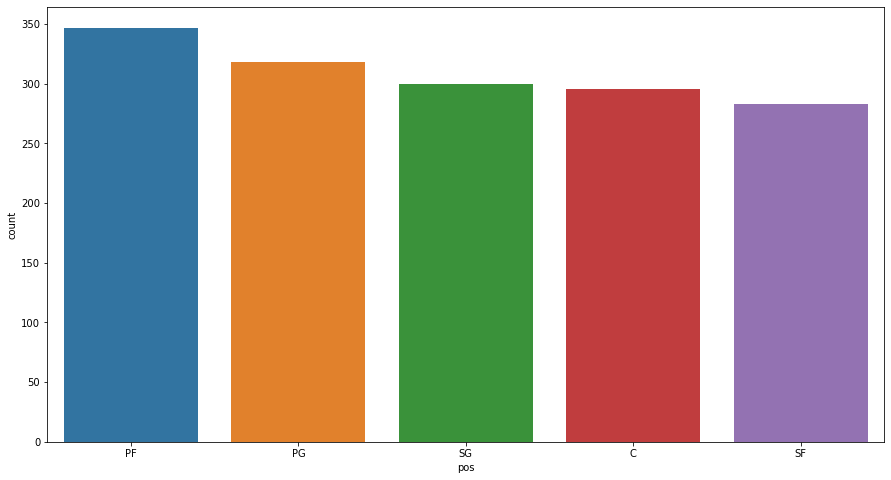

In [48]:
# plot position vs number of injuries
plt.figure(figsize = (15,8))
sns.countplot(x="pos", data=df, order = df['pos'].value_counts().index);

From the count plot above, it can be clealry seen that Power Forwards suffer the greatest nuber of total injuires in this dataset, whereas the Small Forward position reported the least number of total injuries.

The next phase of the analysis is to obtain a breakdown of each of the five positions by specific injurty types. This will reveal which injury types are most common for each position, according to this dataset.

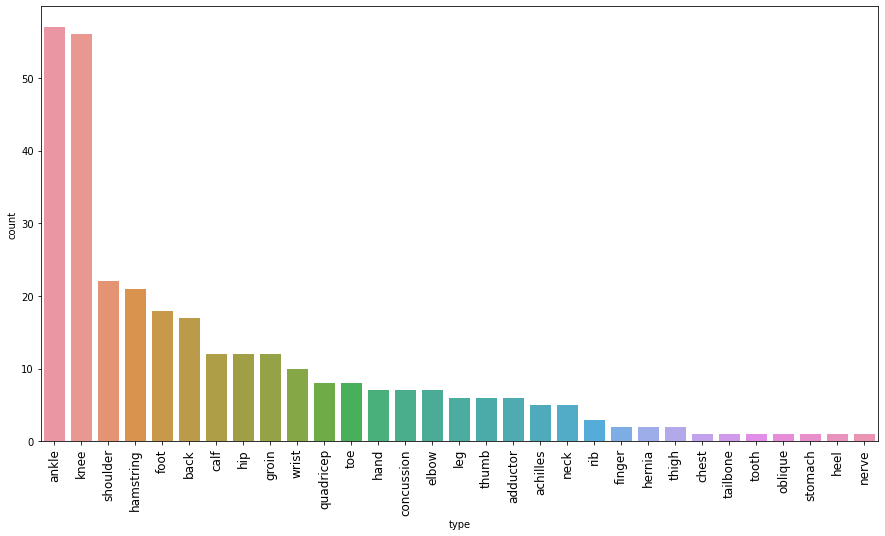

In [49]:
# plot injury type (5 different ones for each position)
plt.figure(figsize = (15,8))
sns.countplot(x="type", data=df[df["pos"]=="PG"], order = df[df['pos'] == "PG"]['type'].value_counts().index)
plt.xticks(rotation = 90, fontsize=12)
plt.show()
# plot from most to least frequent (left to right)

The count plot above shows that ankle injuries are the most common injuries for Point Guards, closely followed by knee injuries.

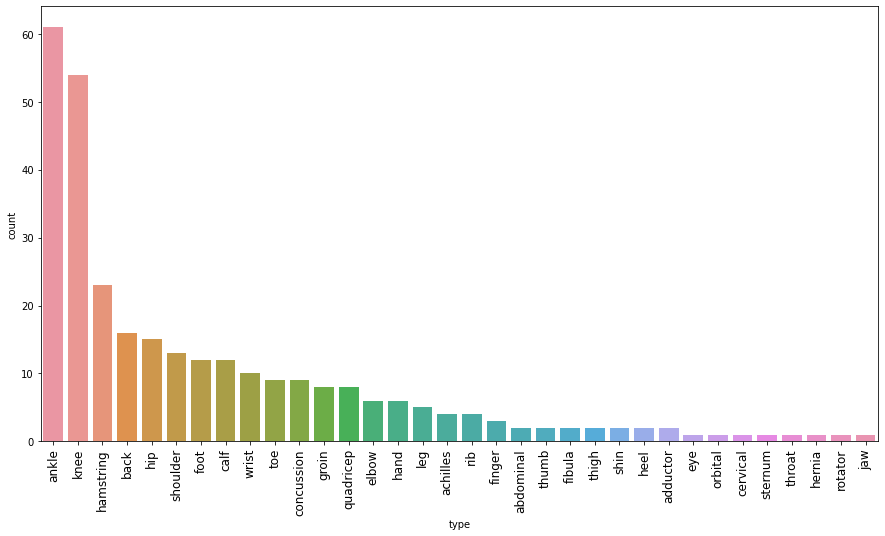

In [50]:
plt.figure(figsize = (15,8))
sns.countplot(x="type", data=df[df["pos"]=="SG"], order = df[df['pos'] == "SG"]['type'].value_counts().index)
plt.xticks(rotation = 90, fontsize=12)
plt.show()
# plot from most to least frequent (left to right)

The count plot above shows that ankle injuries are the most common injuries for Shooting Guards, closely followed by knee injuries.

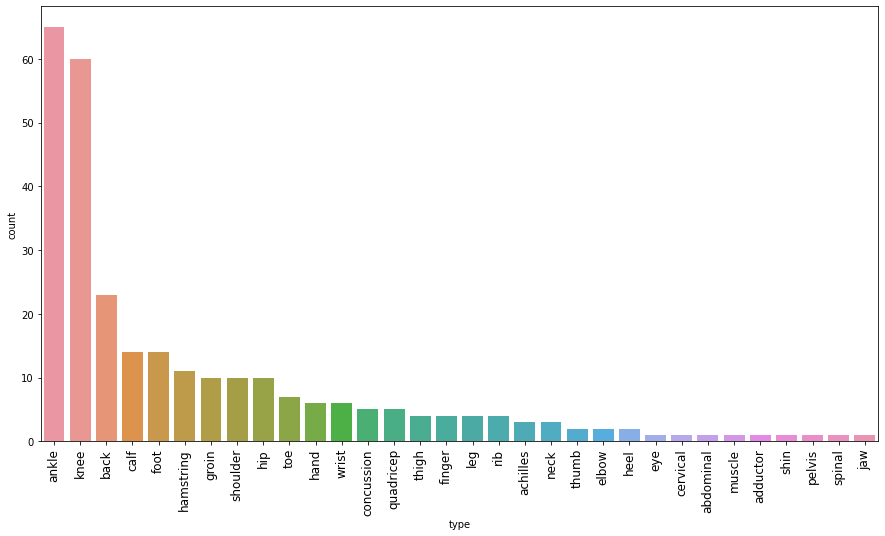

In [51]:
plt.figure(figsize = (15,8))
sns.countplot(x="type", data=df[df["pos"]=="SF"], order = df[df['pos'] == "SF"]['type'].value_counts().index)
plt.xticks(rotation = 90, fontsize=12)
plt.show()
# plot from most to least frequent (left to right)

The count plot above shows that ankle injuries are the most common injuries for Small Forwards, closely followed by knee injuries.

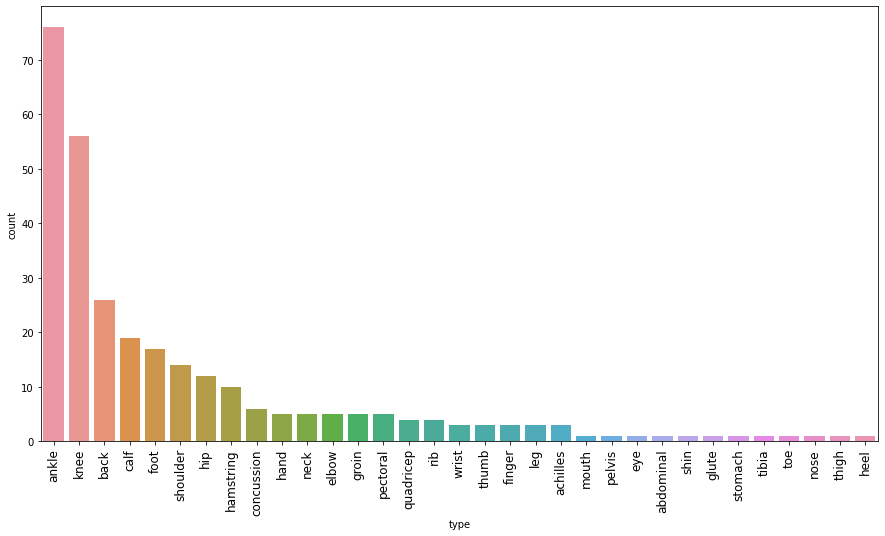

In [52]:
plt.figure(figsize = (15,8))
sns.countplot(x="type", data=df[df["pos"]=="C"], order = df[df['pos'] == "C"]['type'].value_counts().index)
plt.xticks(rotation = 90, fontsize=12)
plt.show()
# plot from most to least frequent (left to right)

The count plot above shows that ankle injuries are the most common injuries for Centers, followed by knee injuries (though not as closely followed as for Point Guards, Small Forwards, and Shooting Guards). 

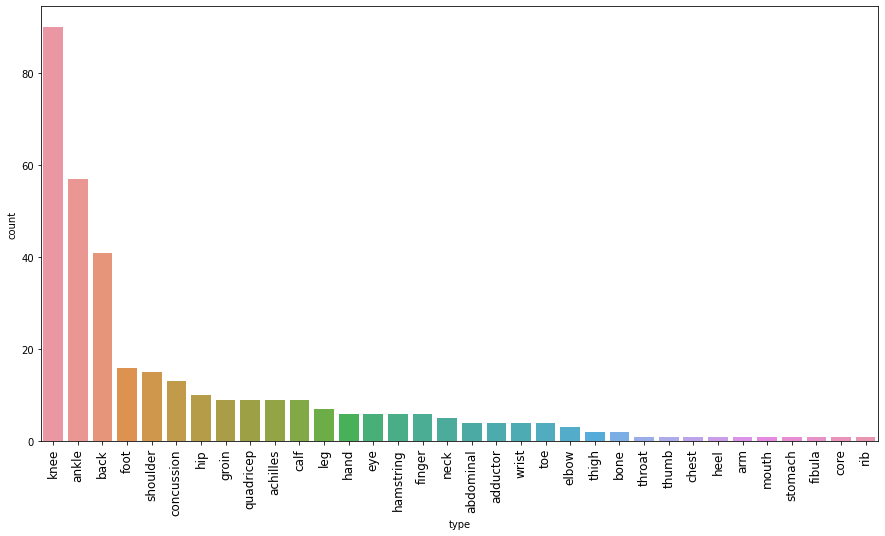

In [53]:
plt.figure(figsize = (15,8))
sns.countplot(x="type", data=df[df["pos"]=="PF"], order = df[df['pos'] == "PF"]['type'].value_counts().index)
plt.xticks(rotation = 90, fontsize=12)
plt.show()
# plot from most to least frequent (left to right)

The countplot above shows that knee injuries are by far the most common injuries for Power Forwards, distantly followed by knee and back injuries. This is an interesting observation. The Power Forward position is unique because for the four other positions, ankle injuries are the most prevalent. However, this is not the case here.

From the five countplots above, it is evident that knee and ankle injuries are the most numerous injuries in bastkebtall by a significant margin.

To gain further insights into the relationship between basketball positions and injuries, it would be interesting to see how the total number of injuries has changed over time for each position. Plotting a line plot will allow us to compare the trends for the different positions.

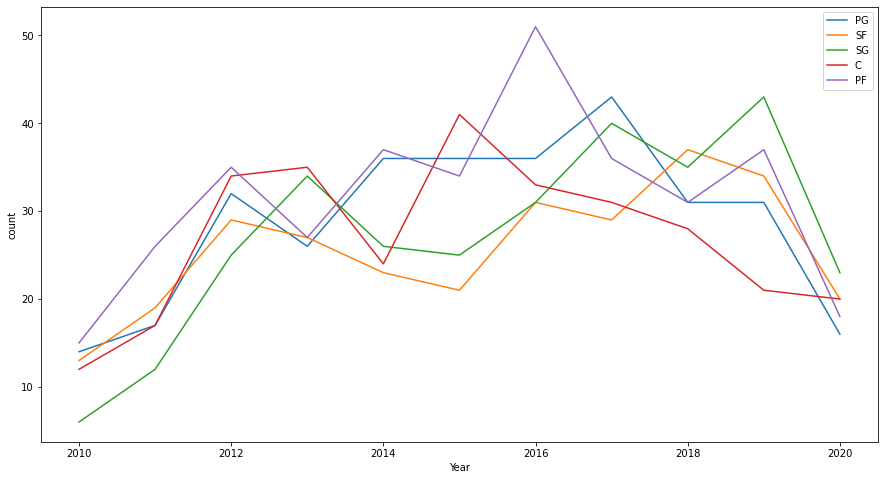

In [54]:
# plot total number of injuries per season for each position over time
plt.figure(figsize = (15,8))
PG_count = (df[df['pos'] == "PG"]['year'].value_counts()).sort_index()
SG_count = (df[df['pos'] == "SG"]['year'].value_counts()).sort_index()
SF_count = (df[df['pos'] == "SF"]['year'].value_counts()).sort_index()
C_count = (df[df['pos'] == "C"]['year'].value_counts()).sort_index()
PF_count = (df[df['pos'] == "PF"]['year'].value_counts()).sort_index()

year_list = []
for i in range(2010, 2021):
    year_list.append(i)

sns.lineplot(x=year_list, y=PG_count).set_xlabel('Year')  # PG
sns.lineplot(x=year_list, y=SF_count).set_ylabel('count') # SF
sns.lineplot(x=year_list, y=SG_count)  # SG
sns.lineplot(x=year_list, y=C_count)  # C
sns.lineplot(x=year_list, y=PF_count)  # PF
plt.legend(labels=["PG","SF","SG","C","PF"]);

These line plots show some similarities in the trends of how the total number of reported injuries has changed over time for the different positions. The observations include:
1. There is a sharp rise in the total number of injuries reported for all positions between 2010 and 2012.
2. For Power Forwards, which were shown earlier to get injured the most, the total number of injuries reported peaked in 2016, with around 50 separate injuries.
3. In recent years, there hase been a sharp decline in the total number of injuries reported for all positions. This could perhaps be due to adavancements in sports medicine and physical therapy, which has helped NBA players to become less prone to injury. However, this is only speculation. We do not have sufficient data to investigate this further, so testing this hypothesis is beyond the scope of this project.

For the next phase of the analysis, we want to see if there are any confounding factors that are correlated with certain injuries. Such confounding factors include the physical attributes of the basketball players, such as height, weight, and age. 

We can begin this phase of the analysis by first mapping out the relationship between player height and player weight and classifying these data points by position.

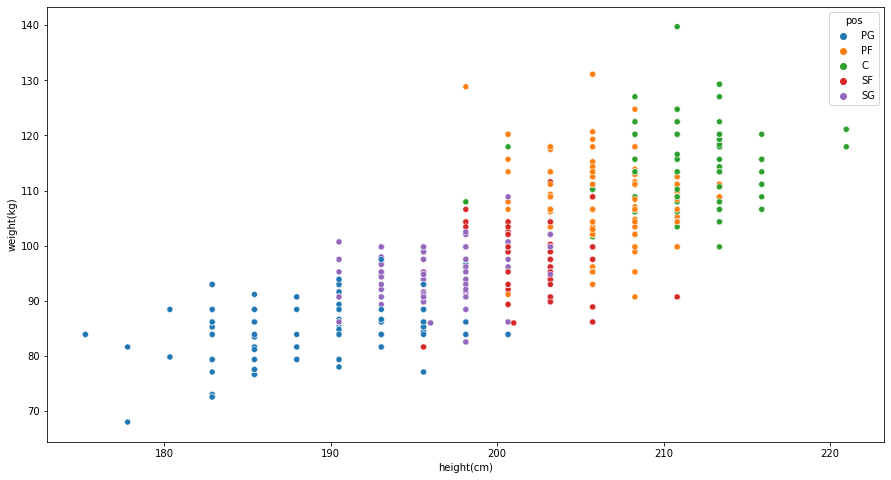

In [55]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="height(cm)", y="weight(kg)", hue="pos", data=df);

In the scatter plot above, the different positions are clustered into different areas. We see that the biggest players are centers, as they tend to be taller and heavier. Conversely, players who are Point Guards are usually smaller as than other players as they tend to be shorter and lighter. Recall that our analysis previously showed that Point Guards reported the highest total number of injuries in this dataset. This suggests that size may indeed be a confounding factor for injuries, as smaller players may get injured more frequently. However, at this point there is not enough evidence to confirm this hypothesis.   

Next, we look at the distirbution of ages for the NBA players in our dataset.

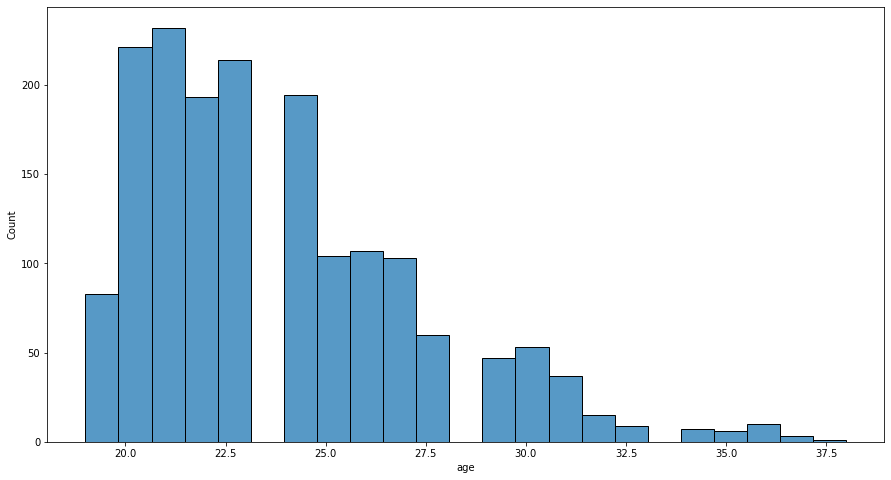

In [56]:
plt.figure(figsize = (15,8))
sns.histplot(x="age", data=df);

The histogram above shows that the vast majority of NBA players are below the age of 30. In fact, most NBA players are in their early to mid-twenties.

To get a more detailed picture of how height and weight are distibuted in the NBA, we break down the distributions of height and weight by position using histograms and multi-grid plots (FacetGrid).

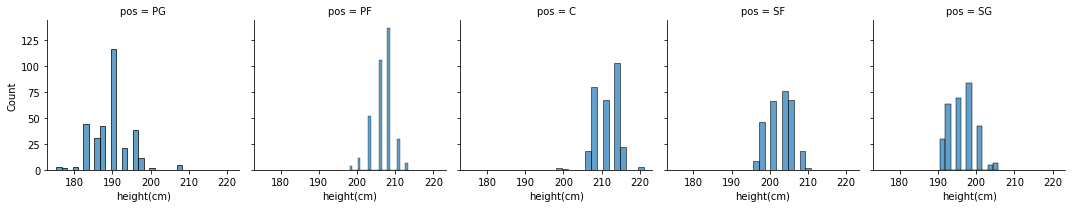

In [57]:
heights = sns.FacetGrid(df, col="pos")
heights.map(sns.histplot, "height(cm)", alpha=.7)
heights.add_legend();

These histograms illustrate the difference in height distribution between Point Guards and the other positions. The most common height for Point Guards is 190cm, whereas the most common heights for the other positions are all higher. In the inference section, a T-test is used to determine if this difference in height is statistically significant.

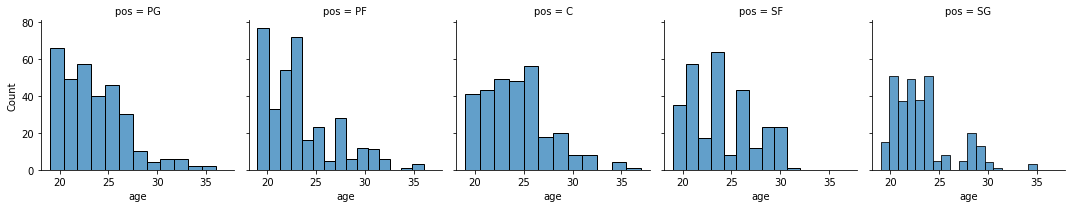

In [58]:
age = sns.FacetGrid(df, col="pos")
age.map(sns.histplot, "age", alpha=.7)
age.add_legend();

These histograms illustrate the difference in age distribution between Small Forwards and the other positions. The histograms for the other positions are all clearly skewed right, whereas for Small Forwards the distribution is more uniform. In the inference section, a T-test is used to determine if this difference in age is statistically significant.

## Inference

After completing the analysis, we now use T-tests to see if we can find any strong correlations between variables such as position, injuries, age, height, and weight.

In [59]:
# do ttest, see if the relationship between position and injury has correlation, or other things like age, weight, height
PG = df[df['pos'] == 'PG']['age']
notPG = df[df['pos'] != 'PG']['age']
t_val = (ttest_ind(PG, notPG))[0]
p_val = (ttest_ind(PG, notPG))[1]
print(p_val)
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

0.20462243451797976
There is NOT a significant difference!


This test shows that there is not a statistically significant difference in age between Point Guards and the other positions, which is what we would expect from the height histograms we saw before. This establishes that our findings from the data visualization are corroborated by the T-test.

In [60]:
PG = df[df['pos'] == 'SF']['age']
notPG = df[df['pos'] != 'SF']['age']
t_val = (ttest_ind(PG, notPG))[0]
p_val = (ttest_ind(PG, notPG))[1]
print(p_val)
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

0.3505583699715965
There is NOT a significant difference!


This test shows that although the histograms showed that the age distirbution for Small Forwards is different compared to the other postions, there is not a statistically significant difference in age between Small Forwards and the other positions. This suggests that age may not be a contributing factor for the comparativley low number of injuries reported for Small Forwards. 

In [61]:
PG = df[df['pos'] == 'PG']['height(cm)']
notPG = df[df['pos'] != 'PG']['height(cm)']
t_val = (ttest_ind(PG, notPG))[0]
p_val = (ttest_ind(PG, notPG))[1]
print(p_val)
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

1.0669699189988562e-224
There is a significant difference!


This test shows that there is a statistically signficant difference in height between Point Guards and the other positions. There appears to be a correlation between the Point Guard position and height. This may lend some credence to the theory that the comparatively smaller stature of Point Guards contributes to them getting injured more, but this is still insufficient evidence to argue that this is a causal link.

In [62]:
Knee = df[df['type'] == 'knee']['height(cm)']
notKnee = df[df['type'] != 'knee']['height(cm)']
t_val = (ttest_ind(Knee, notKnee))[0]
p_val = (ttest_ind(Knee, notKnee))[1]
print(p_val)
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

0.09701780918887003
There is NOT a significant difference!


This test shows that there is not a statistically significant difference in height between players who suffered knee injuries and those that did not. This suggests that height is not correlated with knee injuries and that other factors may increase the risk of knee injury (height is not a confounding factor).

In [63]:
Ankle = df[df['type'] == 'ankle']['height(cm)']
notAnkle = df[df['type'] != 'ankle']['height(cm)']
t_val = (ttest_ind(Ankle, notAnkle))[0]
p_val = (ttest_ind(Ankle, notAnkle))[1]
print(p_val)
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

0.15465595926919515
There is NOT a significant difference!


This test shows that there is not a statistically significant difference in height between players who suffered ankle injuries and those that did not. This suggests that height is not correlated with ankle injuries and that other factors may increase the risk of ankle injury (height is not a confounding factor).

In [64]:
Knee = df[df['type'] == 'knee']['age']
notKnee = df[df['type'] != 'knee']['age']
t_val = (ttest_ind(Knee, notKnee))[0]
p_val = (ttest_ind(Knee, notKnee))[1]
print(p_val)
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

0.4135241517396937
There is NOT a significant difference!


This test shows that there is not a statistically significant difference in age between players who suffered knee injuries and those that did not. This suggests that age is not correlated with knee injuries and that other factors may increase the risk of knee injury.

In [65]:
Ankle = df[df['type'] == 'ankle']['age']
notAnkle = df[df['type'] != 'ankle']['age']
t_val = (ttest_ind(Ankle, notAnkle))[0]
p_val = (ttest_ind(Ankle, notAnkle))[1]
print(p_val)
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

0.009391442865145977
There is a significant difference!


This test shows that there is a statistically signficant difference in age between players that suffered ankle injuries and those that did not. Ankle injuries appear to be correlated with age. Further investigation is needed to determine the nature of this correlation, but for now we can conclude that age is a confounding factor for ankle injuries.